In [78]:
import matplotlib
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas


In [79]:
# formating
plot_size = (25,10) #set plot size (entire plot)

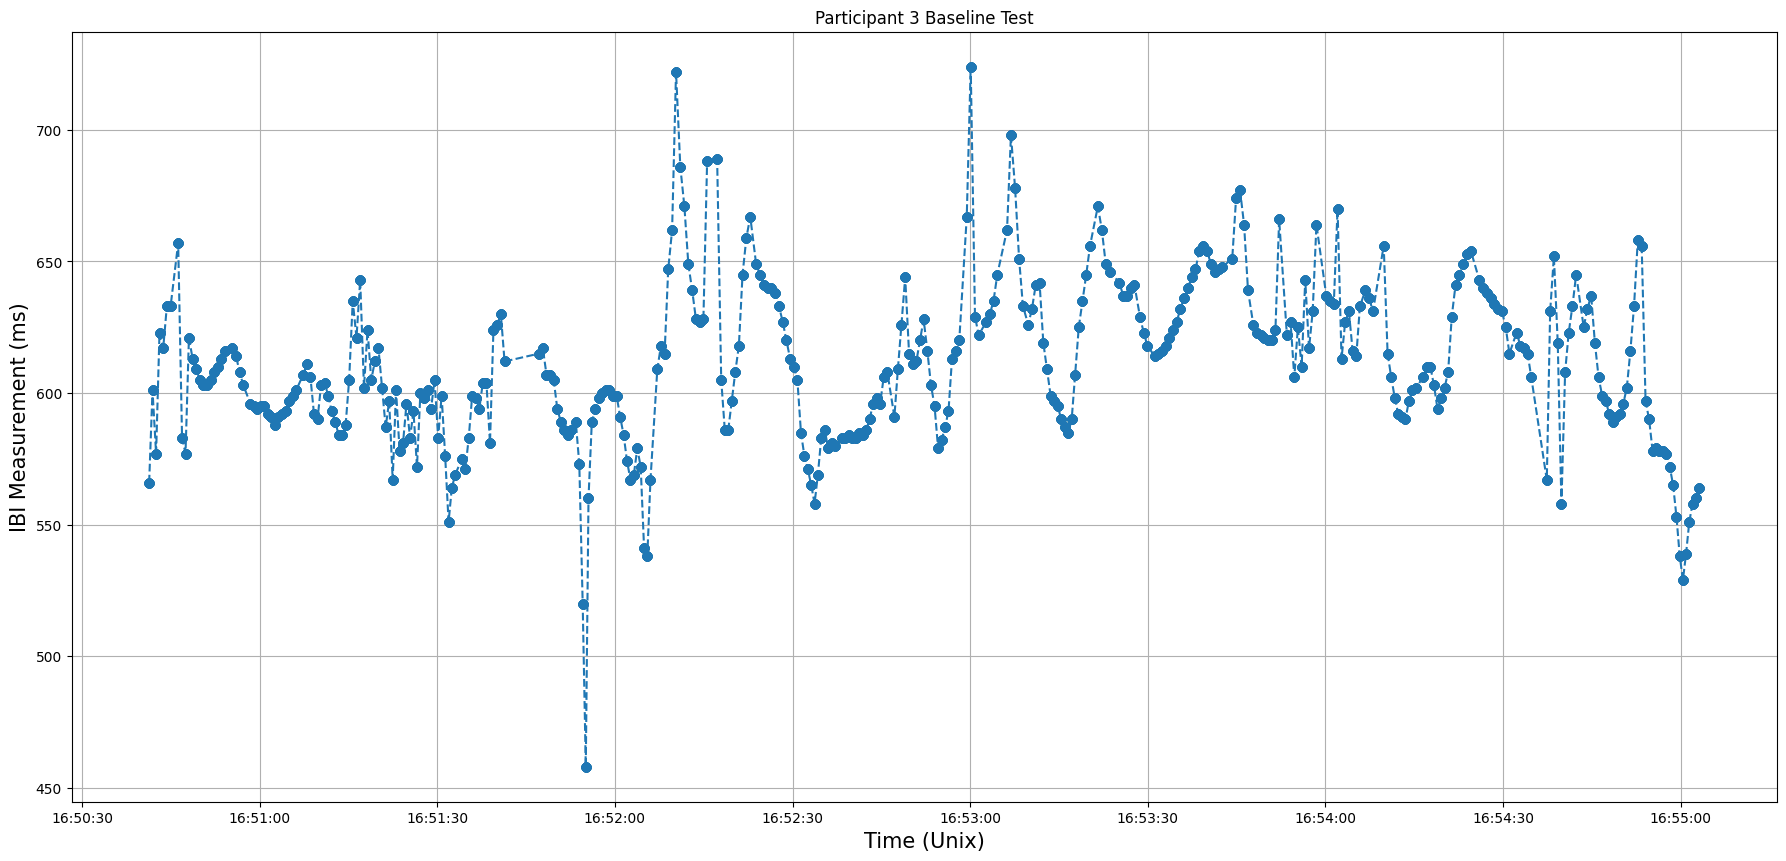

In [80]:
# plot participant 3 baseline test

# read values
df_p1 = pandas.read_csv(r"C:\Users\C23Price.Johnson\Desktop\Capstone\Capstone Project\Pain-Identification\src\raw_data\raw_data_garmin\participant_3_BL.csv")
df_p1.describe()
p1_np = df_p1.values
p1_np = p1_np[:,[2,3]]
p1_np = p1_np[p1_np[:, 0].argsort()]

# decorate
fig = plt.figure()
ax = plt.axes()
plt.grid()
plt.title("Participant 3 Baseline Test")
plt.xlabel('Time (Unix)', fontsize=15)
plt.ylabel('IBI Measurement (ms)', fontsize=15)
plt.rcParams['figure.figsize'] = plot_size

# x axis timing
plot_width_seconds = p1_np[0,0] - p1_np[0,1]
min_time = p1_np[1,0]
max_time = min_time + plot_width_seconds

# define indices and x values
indices = get_indices(p1_np[:,0], min_time, max_time)
x_vals = [datetime.utcfromtimestamp(t/1000) for t in p1_np[indices,0]] #convert to datetime objects

# plot
plt.plot(x_vals,p1_np[indices,1], 'o', linestyle = '--')

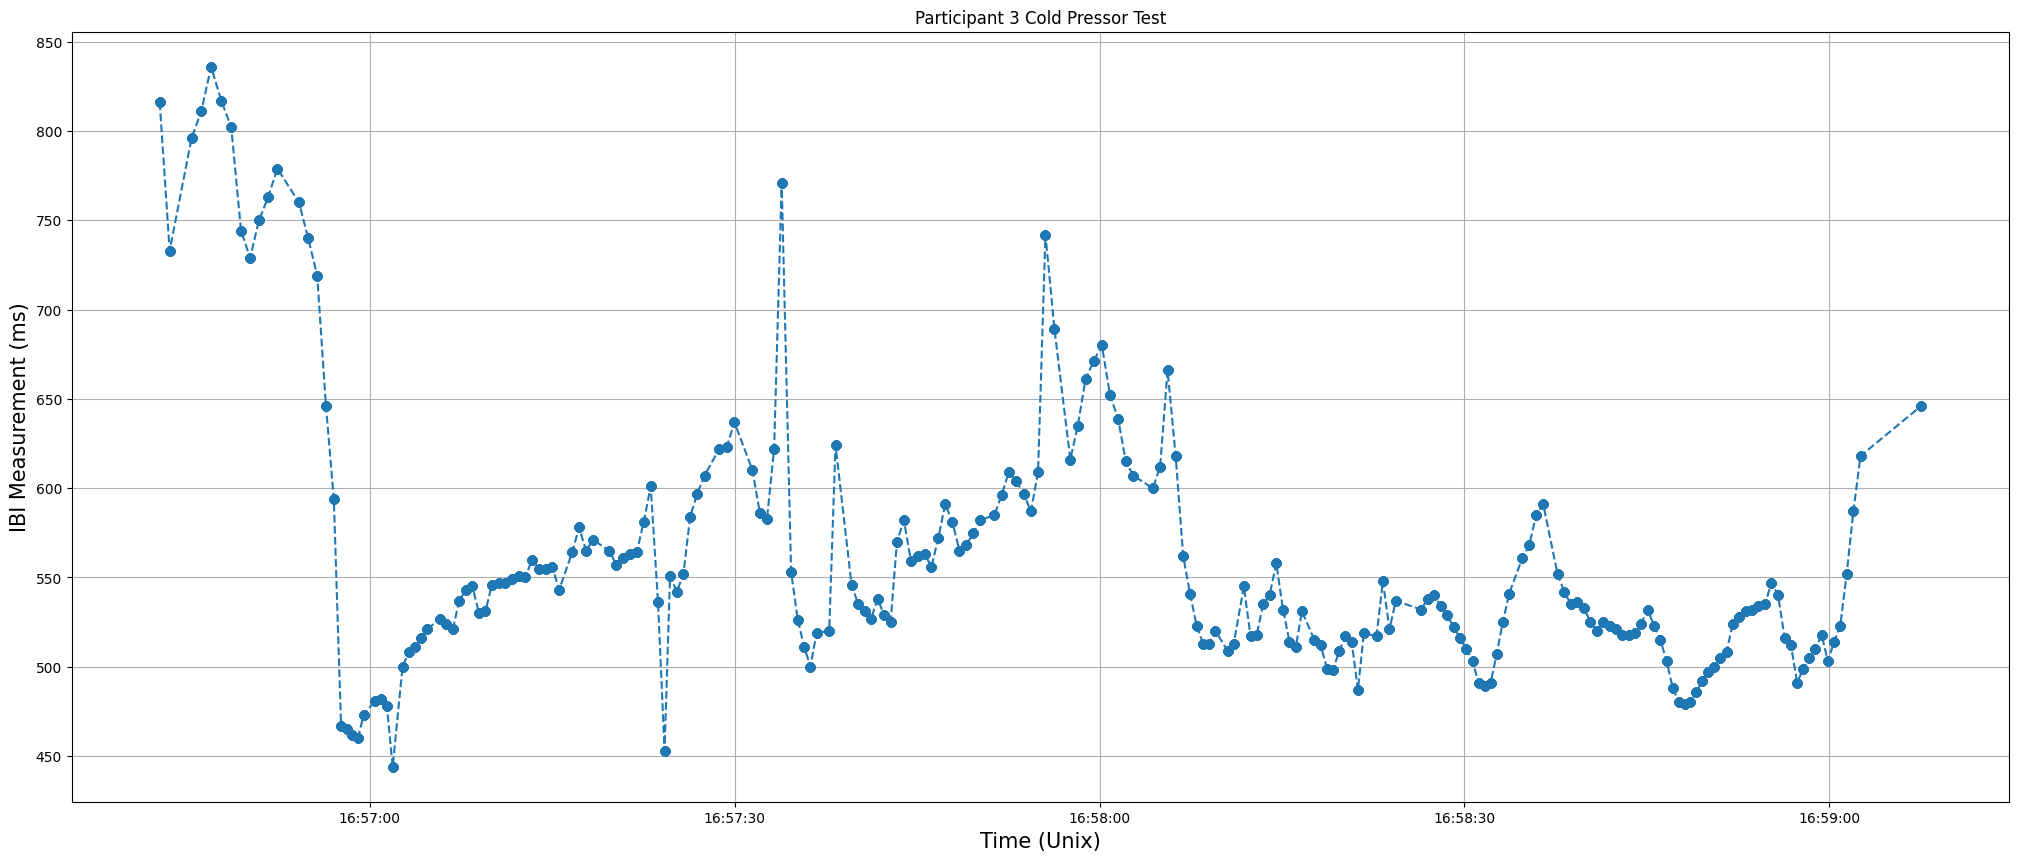

In [81]:
# plot participant 3 cold pressor test

df_p1 = pandas.read_csv(r"C:\Users\C23Price.Johnson\Desktop\Capstone\Capstone Project\Pain-Identification\src\raw_data\raw_data_garmin\participant_3_CPT.csv")
df_p1.describe()
p1_np = df_p1.values
p1_np = p1_np[:,[2,3]] #2 is time, 3 is ibi becomes 0 and 1

p1_np = p1_np[p1_np[:, 0].argsort()]

#decorate
fig = plt.figure()
ax = plt.axes()
plt.grid()
plt.title("Participant 3 Cold Pressor Test")
plt.xlabel('Time (Unix)', fontsize=15)
plt.ylabel('IBI Measurement (ms)', fontsize=15)
plt.rcParams['figure.figsize'] = plot_size

# x axis timing
plot_width_seconds = p1_np[0,0] - p1_np[0,1]
min_time = p1_np[1,0]
max_time = min_time + plot_width_seconds

# define indices and x values
indices = get_indices(p1_np[:,0], min_time, max_time)
x_vals = [datetime.utcfromtimestamp(t/1000) for t in p1_np[indices,0]] #convert to datetime objects

# plot
plt.plot(x_vals,p1_np[indices,1], 'o', linestyle = '--')

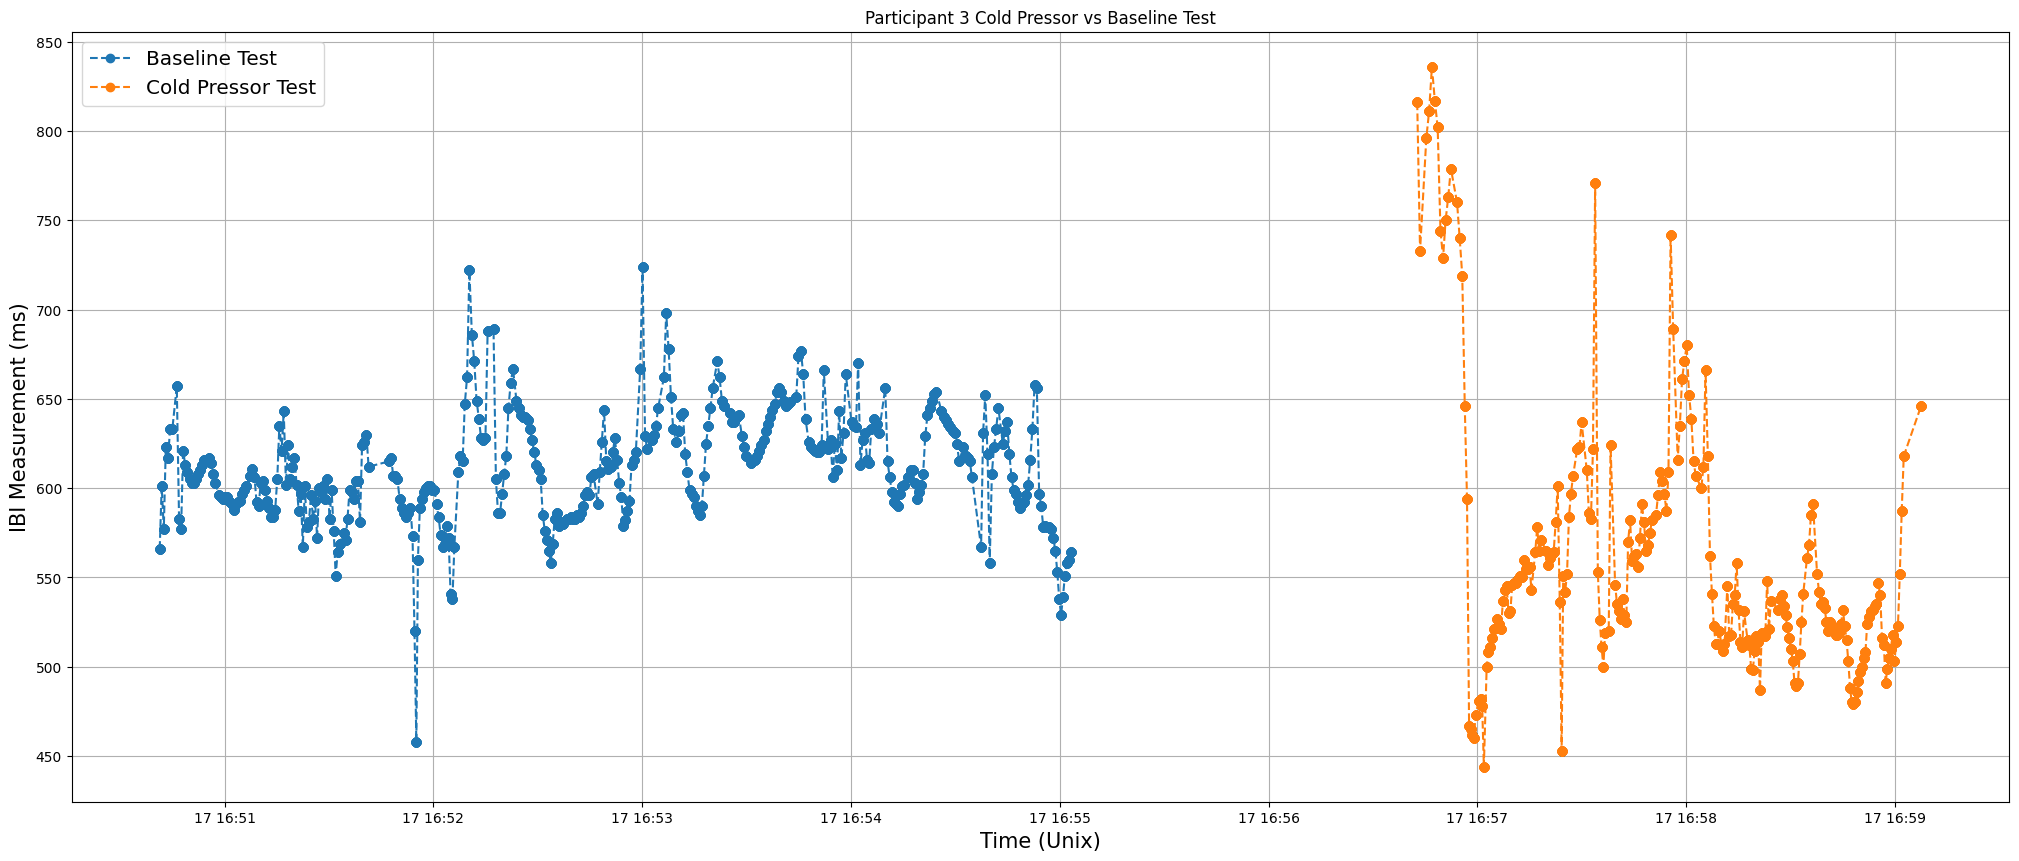

In [89]:
# plot participant 3 baseline and cold pressor test

# baseline
df_p1bl = pandas.read_csv(r"C:\Users\C23Price.Johnson\Desktop\Capstone\Capstone Project\Pain-Identification\src\raw_data\raw_data_garmin\participant_3_BL.csv")
df_p1bl.describe()
p1bl_np = df_p1bl.values
p1bl_np = p1bl_np[:,[2,3]]
p1bl_np = p1bl_np[p1bl_np[:, 0].argsort()]

# cold Pressor
df_p1cp = pandas.read_csv(r"C:\Users\C23Price.Johnson\Desktop\Capstone\Capstone Project\Pain-Identification\src\raw_data\raw_data_garmin\participant_3_CPT.csv")
df_p1cp.describe()
p1cp_np = df_p1cp.values
p1cp_np = p1cp_np[:,[2,3]] #2 is time, 3 is ibi
p1cp_np = p1cp_np[p1cp_np[:, 0].argsort()]

# decorate
fig = plt.figure()
ax = plt.axes()
plt.grid()
plt.title("Participant 3 Cold Pressor vs Baseline Test")
plt.xlabel('Time (Unix)', fontsize=15)
plt.ylabel('IBI Measurement (ms)', fontsize=15)
plt.rcParams['figure.figsize'] = plot_size

# x axis timing
# baseline
plot_width_seconds_bl = p1bl_np[0,0] - p1_np[0,1]
min_time_bl = p1bl_np[1,0]
max_time_bl = min_time_bl + plot_width_seconds_bl

# cold pressor
plot_width_seconds_cp = p1cp_np[0,0] - p1cp_np[0,1]
min_time_cp = p1cp_np[1,0]
max_time_cp = min_time_cp + plot_width_seconds_cp

# define indices and x values
# baseline
indices_bl = get_indices(p1bl_np[:,0], min_time_bl, max_time_bl)
x_vals_bl = [datetime.utcfromtimestamp(t/1000) for t in p1bl_np[indices_bl,0]] #convert to datetime objects

# cold pressor
indices_cp = get_indices(p1cp_np[:,0], min_time_cp, max_time_cp)
x_vals_cp = [datetime.utcfromtimestamp(t/1000) for t in p1cp_np[indices_cp,0]] #convert to datetime objects

# plot
line1, = plt.plot(x_vals_bl,p1bl_np[indices_bl,1], 'o', linestyle = '--', label = 'Baseline Test')
line2, = plt.plot(x_vals_cp,p1cp_np[indices_cp,1], 'o', linestyle = '--', label = 'Cold Pressor Test')

# legend
plt.legend(handles=[line1, line2], loc='upper left', fontsize = 'x-large')

In [28]:
def get_indices(time_data, start_time, end_time):
    """Return indecies of time_data that are >= start_time and < end_time
    
    time_data  - np array of type float, time_data indices will correlate to
    start_time - float, a timestamp for the start
    end_time   - float, a timestamp for the end
    
    return     - a tuple of indices
    """
    return tuple(np.where(
        np.logical_and(
            np.greater_equal(time_data, start_time), np.less(time_data, end_time)
        ))[0])